# My First Notebook

## The first 5 rows

In [1]:
from read_csv import df
df.head(5)

,Name,Item,Quantity,$/Quantity,Seller,Shipping from,Shipping to,Legal,Category,In Stock
0,Amazon Carding Tutorial,eBook,1,5,topnotchdrugz,Worldwide,Worldwide,yes?,Information/eBook,498.0
1,12 Ways To Rob A ATM Machine,eBook,1,3,topnotchdrugz,Worldwide,Worldwide,yes?,Information/eBook,99.0
2,How to use socks 5,files,1,1,Hackyboy,Worldwide,Worldwide,yes?,Information/Guides,999.0
3,Hdvpass.com Porn Premium Account Plus Warranty,accounts,1,3,enjoymyaccounts,Worldwide,Worldwide,no,Information/other,998.0
4,NORD VPN 6 Months Subscription + WARRANTY,accounts,1,3.2,pornseller,Worldwide,Worldwide,no,Information/other,999.0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


Text(0.5, 0, 'Frequency')

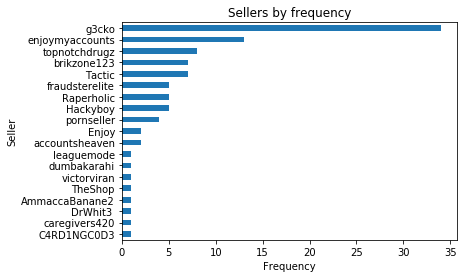

In [3]:
sellers_by = df["Seller"].value_counts()
sellers_by.sort_values().plot(kind='barh')
plt.title('Sellers by frequency')
plt.ylabel('Seller')
plt.xlabel('Frequency')